In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


Connect to Database

In [21]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


Create Table

In [22]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    region TEXT,
    quantity INTEGER,
    price REAL,
    cost REAL,
    sale_date TEXT
)
""")
conn.commit()


Inser Data in Database


In [23]:
def insert_data():
    n = int(input("How many records: "))

    for i in range(n):
        print(f"\nRecord {i+1}")
        product = input("Product Name: ")
        region = input("Region: ")
        quantity = int(input("Quantity: "))
        price = float(input("Selling Price: "))
        cost = float(input("Cost Price: "))
        date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        if quantity <= 0 or price <= 0:
            print("❌ Invalid data")
            continue

        cursor.execute("""
        INSERT INTO sales (product, region, quantity, price, cost, sale_date)
        VALUES (?, ?, ?, ?, ?, ?)
        """, (product, region, quantity, price, cost, date))

    conn.commit()
    print("✅ Inserted Successfully!")


View Records

In [24]:
def view_data():
    df = pd.read_sql_query("SELECT * FROM sales", conn)
    print("\n📋 Records:")
    print(df)


Update Records

In [25]:
def update_data():
    id_update = int(input("Enter ID to update: "))
    new_qty = int(input("New Quantity: "))
    new_price = float(input("New Selling Price: "))

    cursor.execute("""
    UPDATE sales
    SET quantity=?, price=?
    WHERE id=?
    """, (new_qty, new_price, id_update))

    conn.commit()
    print("✅ Updated Successfully!")


Delete Records

In [26]:
def delete_data():
    id_delete = int(input("Enter ID to delete: "))
    cursor.execute("DELETE FROM sales WHERE id=?", (id_delete,))
    conn.commit()
    print("✅ Deleted!")


Search by Region

In [27]:
def search_data():
    region = input("Enter region to search: ")
    df = pd.read_sql_query(
        "SELECT * FROM sales WHERE region=?", conn, params=(region,))
    print(df)


#Visualization

In [28]:
def analyze_data():
    df = pd.read_sql_query("SELECT * FROM sales", conn)

    if df.empty:
        print("⚠ No data")
        return

    df["total_sales"] = df["quantity"] * df["price"]
    df["profit"] = (df["price"] - df["cost"]) * df["quantity"]

    print("\n📊 Total Revenue:", df["total_sales"].sum())
    print("📊 Total Profit:", df["profit"].sum())

    region_sales = df.groupby("region")["total_sales"].sum()

    # Bar Chart
    plt.figure()
    region_sales.plot(kind="bar")
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Sales")
    plt.show()

    # Pie Chart
    plt.figure()
    region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title("Region Contribution")
    plt.ylabel("")
    plt.show()

    # Insight
    top_product = df.groupby("product")["quantity"].sum().idxmax()
    print("🔥 Top Selling Product:", top_product)


Bill Generated

In [29]:
def generate_bill():
    id_bill = int(input("Enter ID for bill: "))

    df = pd.read_sql_query(
        "SELECT * FROM sales WHERE id=?", conn, params=(id_bill,))

    if df.empty:
        print("❌ Record not found")
        return

    row = df.iloc[0]
    total = row["quantity"] * row["price"]

    print("\n========== PAYMENT BILL ==========")
    print("Bill No:", row["id"])
    print("Date:", row["sale_date"])
    print("Product:", row["product"])
    print("Region:", row["region"])
    print("Quantity:", row["quantity"])
    print("Price:", row["price"])
    print("----------------------------------")
    print("TOTAL AMOUNT:", total)
    print("==================================")


Menu system


=========== BasketMetrics MENU ===========
1. Insert
2. View
3. Update
4. Delete
5. Search by Region
6. Analyze & Charts
7. Generate Bill
8. Exit
Enter choice: 1
How many records: 4

Record 1
Product Name: Milk
Region: India
Quantity: 4
Selling Price: 29
Cost Price: 30

Record 2
Product Name: Bread
Region: USA
Quantity: 5
Selling Price: 35
Cost Price: 40

Record 3
Product Name: Butter
Region: India
Quantity: 5
Selling Price: 80
Cost Price: 82

Record 4
Product Name: Noodles
Region: Japan
Quantity: 5
Selling Price: 40
Cost Price: 42
✅ Inserted Successfully!

=========== BasketMetrics MENU ===========
1. Insert
2. View
3. Update
4. Delete
5. Search by Region
6. Analyze & Charts
7. Generate Bill
8. Exit
Enter choice: 5
Enter region to search: India
   id product region  quantity  price  cost            sale_date
0   1    Milk  India         4   29.0  30.0  2026-02-13 04:04:42
1   3  Butter  India         5   80.0  82.0  2026-02-13 04:05:23

=========== BasketMetrics MENU ===========
1. I

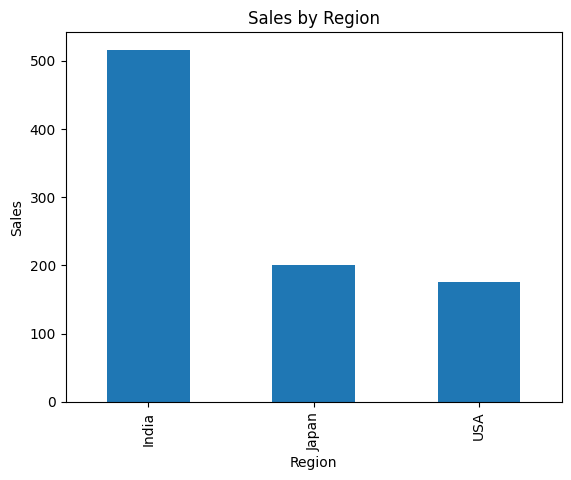

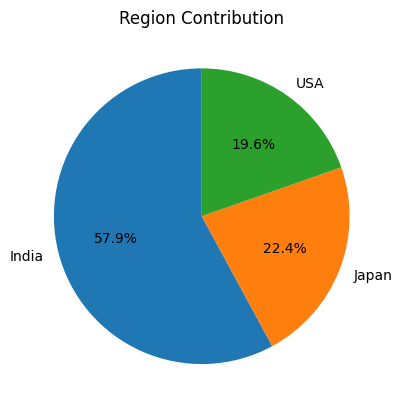

🔥 Top Selling Product: Bread

=========== BasketMetrics MENU ===========
1. Insert
2. View
3. Update
4. Delete
5. Search by Region
6. Analyze & Charts
7. Generate Bill
8. Exit
Enter choice: 7
Enter ID for bill: 123
❌ Record not found

=========== BasketMetrics MENU ===========
1. Insert
2. View
3. Update
4. Delete
5. Search by Region
6. Analyze & Charts
7. Generate Bill
8. Exit
Enter choice: 7
Enter ID for bill: 4

========== PAYMENT BILL ==========
Bill No: 4
Date: 2026-02-13 04:05:44
Product: Noodles
Region: Japan
Quantity: 5
Price: 40.0
----------------------------------
TOTAL AMOUNT: 200.0

=========== BasketMetrics MENU ===========
1. Insert
2. View
3. Update
4. Delete
5. Search by Region
6. Analyze & Charts
7. Generate Bill
8. Exit
Enter choice: 7
Enter ID for bill: 1

========== PAYMENT BILL ==========
Bill No: 1
Date: 2026-02-13 04:04:42
Product: Milk
Region: India
Quantity: 4
Price: 29.0
----------------------------------
TOTAL AMOUNT: 116.0

=========== BasketMetrics MENU ===

In [30]:
while True:
    print("\n=========== BasketMetrics MENU ===========")
    print("1. Insert")
    print("2. View")
    print("3. Update")
    print("4. Delete")
    print("5. Search by Region")
    print("6. Analyze & Charts")
    print("7. Generate Bill")
    print("8. Exit")

    choice = input("Enter choice: ")

    if choice == "1":
        insert_data()
    elif choice == "2":
        view_data()
    elif choice == "3":
        update_data()
    elif choice == "4":
        delete_data()
    elif choice == "5":
        search_data()
    elif choice == "6":
        analyze_data()
    elif choice == "7":
        generate_bill()
    elif choice == "8":
        print("👋 Thank you")
        break
    else:
        print("❌ Invalid choice")
